In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import disk


import nbimporter
from COLOUR_Filt import *

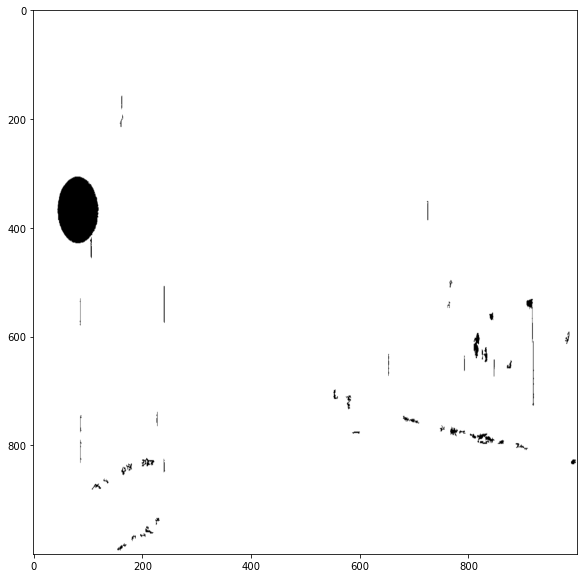

In [48]:
img = cv2.imread('TrainIJCNN2013/00120.ppm')

mask_list , bound_image = RYB_filters(img)
fmask_list = cont_filter(img, mask_list)


[red1_mask, red2_mask, blue_mask, yellow_mask ,white_mask] = fmask_list

img = cv2.resize(red1_mask, (1000, 1000))

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')


<ipython-input-49-adf996f55f3d>:50: RuntimeWarning: invalid value encountered in less
  point_y, point_x = np.where(np.abs(s - target) < delta)
<ipython-input-49-adf996f55f3d>:59: RuntimeWarning: invalid value encountered in less
  point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)


[[0.53680222 0.73183853 0.80827128 ... 0.80827128 0.73183853 0.53680222]
 [0.73183853 0.86295669 0.86243795 ... 0.86243795 0.86295669 0.73183853]
 [0.80827128 0.86243795 0.99250917 ... 0.99250917 0.86243795 0.80827128]
 ...
 [0.80827128 0.86243795 0.99250917 ... 0.99250917 0.86243795 0.80827128]
 [0.73183853 0.86295669 0.86243795 ... 0.86243795 0.86295669 0.73183853]
 [0.53680222 0.73183853 0.80827128 ... 0.80827128 0.73183853 0.53680222]]
(1000, 1000)


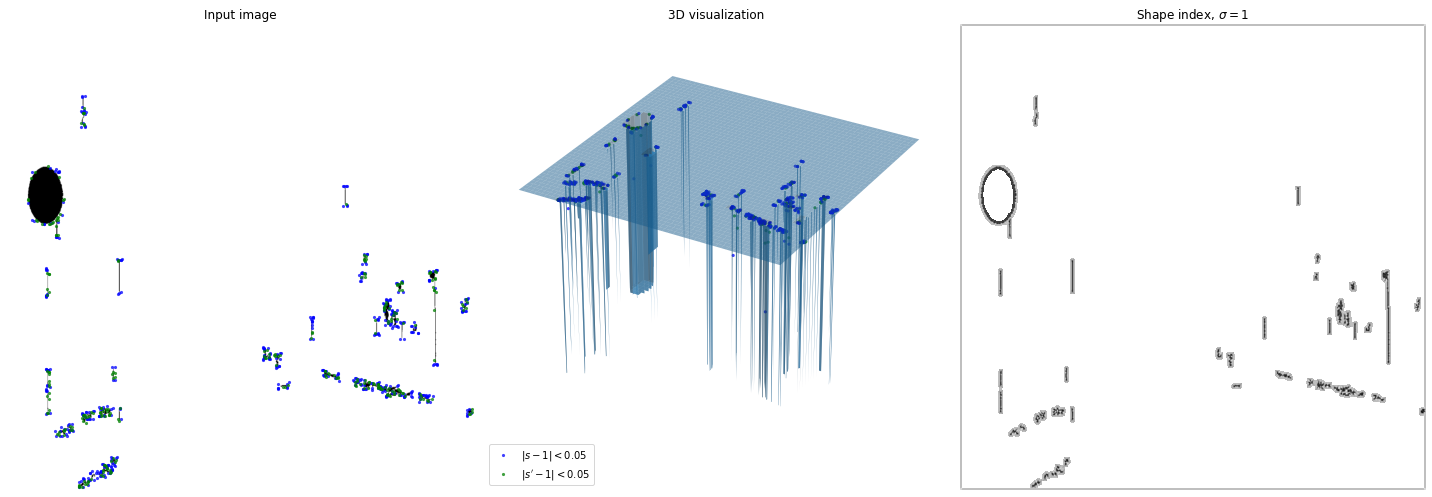

In [49]:
"""
def create_test_image(
        image_size=256, spot_count=30, spot_radius=5, cloud_noise_size=4):

    #Generate a test image with random noise, uneven illumination and spots.
    
    rng = np.random.default_rng()
    image = rng.normal(
        loc=0.25,
        scale=0.25,
        size=(image_size, image_size)
    )

    for _ in range(spot_count):
        rr, cc = disk(
            (rng.integers(image.shape[0]),
             rng.integers(image.shape[1])),
            spot_radius,
            shape=image.shape
        )
        image[rr, cc] = 1

    image *= rng.normal(loc=1.0, scale=0.1, size=image.shape)

    image *= ndi.zoom(
        rng.normal(
            loc=1.0,
            scale=0.5,
            size=(cloud_noise_size, cloud_noise_size)
        ),
        image_size / cloud_noise_size
    )

    return ndi.gaussian_filter(image, sigma=2.0)
"""
# First create the test image and its shape index

image = img

s = shape_index(image)
print(s)

# In this example we want to detect 'spherical caps',
# so we threshold the shape index map to
# find points which are 'spherical caps' (~1)

target = 0.3
delta = 0.01

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

# The shape index map relentlessly produces the shape, even that of noise.
# In order to reduce the impact of noise, we apply a Gaussian filter to it,
# and show the results once in

s_smooth = ndi.gaussian_filter(s, sigma=1)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]


fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Input image')
print(image.shape)

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)

ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharex=ax1, sharey=ax1)

x, y = np.meshgrid(
    np.arange(0, image.shape[0], 1),
    np.arange(0, image.shape[1], 1)
)

ax2.plot_surface(x, y, image, linewidth=0, alpha=0.5)

ax2.scatter(
    point_x,
    point_y,
    point_z,
    color='blue',
    label='$|s - 1|<0.05$',
    **scatter_settings
)

ax2.scatter(
    point_x_s,
    point_y_s,
    point_z_s,
    color='green',
    label='$|s\' - 1|<0.05$',
    **scatter_settings
)

ax2.legend(loc='lower left')

ax2.axis('off')
ax2.set_title('3D visualization')

ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)

ax3.imshow(s, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Shape index, $\sigma=1$')

fig.tight_layout()

plt.show()